<a href="https://colab.research.google.com/github/rajesh0305/Karbon/blob/main/problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#PROBLEM STATEMENT:

You are provided with a CSV file named credit score.csv' containing customer information. Your task is to write a Python script to clean this data. Specifically, you need to:

a.     Remove any duplicate entries.

b.     Identify and address any missing values, mismatch data types, inconsistencies, or outliers.

Utilize appropriate visualizations (e.g., histograms, scatter plots, box plots, correlation matrices) to uncover patterns and insights.


**step1:**Now loading/reading the dataset

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/karbon_dataset/karbon dataset/Credit Score(in).csv')

<ipython-input-4-f4067cc6e5bf>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('/content/drive/MyDrive/karbon_dataset/karbon dataset/Credit Score(in).csv')


**Step1.1** Data PreProcessing

1->Visualization of dataset

In [ ]:
df.shape

(100000, 27)

**Observation :** by seeing the shape of the dataset "we can conclude that dataset have 100K row and the 27 column/Atributes/features

In [ ]:

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("total number of numerical features ",len(numerical_features))
print("total number of categorical features",len(categorical_features))

Numerical Features: ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
Categorical Features: ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']
total number of numerical features  8
total number of categorical features 19


**Observation:**By looking the list of the numerical and the categirical features then


1.   Number of Numerical features=8

2.   Number of Categorical feature=19



In [ ]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


**Observation:** by looking the First 5 tuple of the dataset(D) there are more nan value as well as blank value in the some features

Histogram Plot

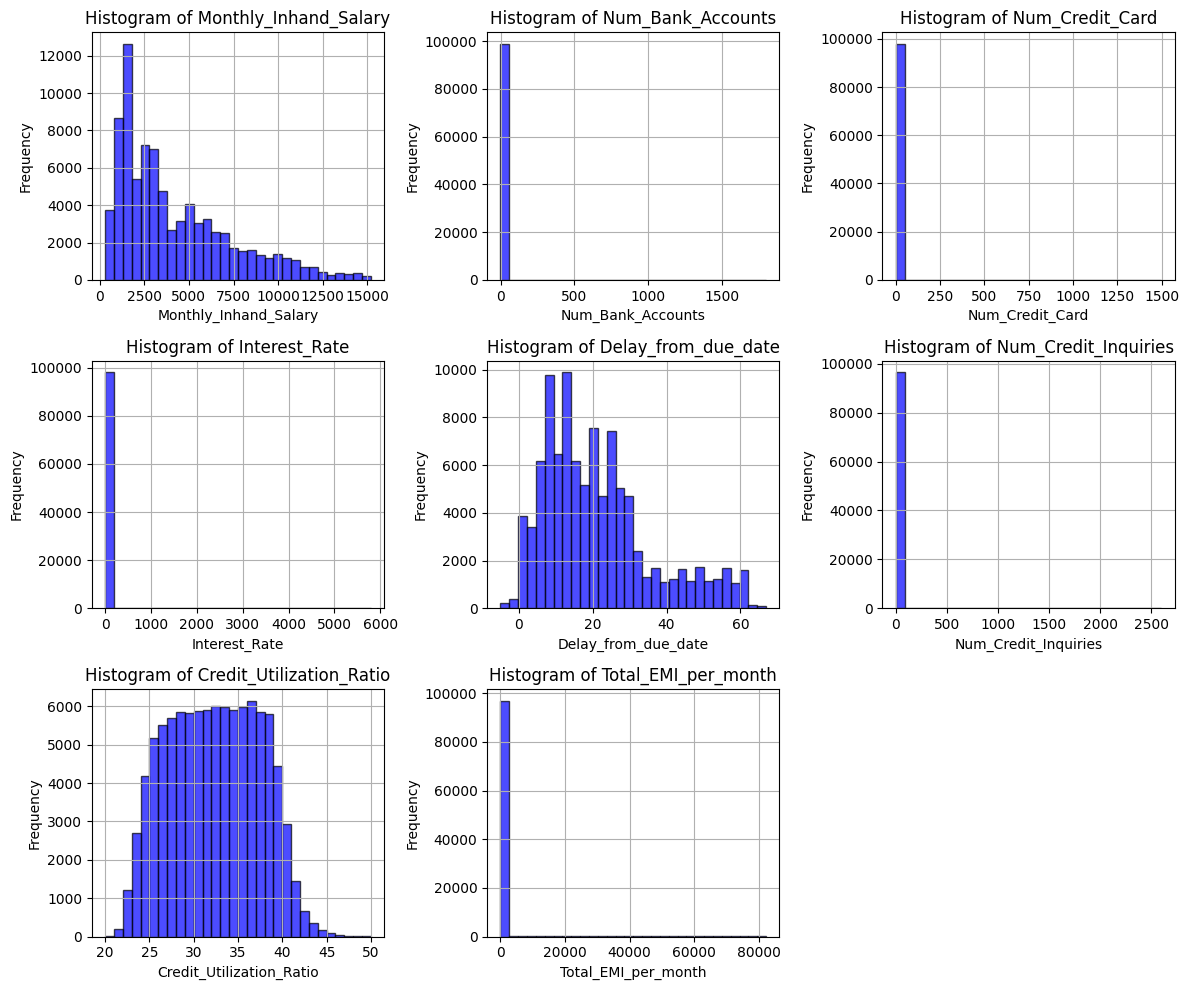

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//3 + 1, 3, i)
    df[column].hist(bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Observation:**

1. By looking the histogram of the monthly_inhand_salary with the frequency of the employee=====>This is look like following the **"Power low Distribution"**

2. By looking the histogram of the Delay_from_due_date with the frequency of the employee=====>This is look like following the **"log normal Distribution"**

3. By looking the histogram of the Credit_Utilization_ratio with the frequency of the employee=====>This is look like following somewere like the **" Normal lDistribution"**

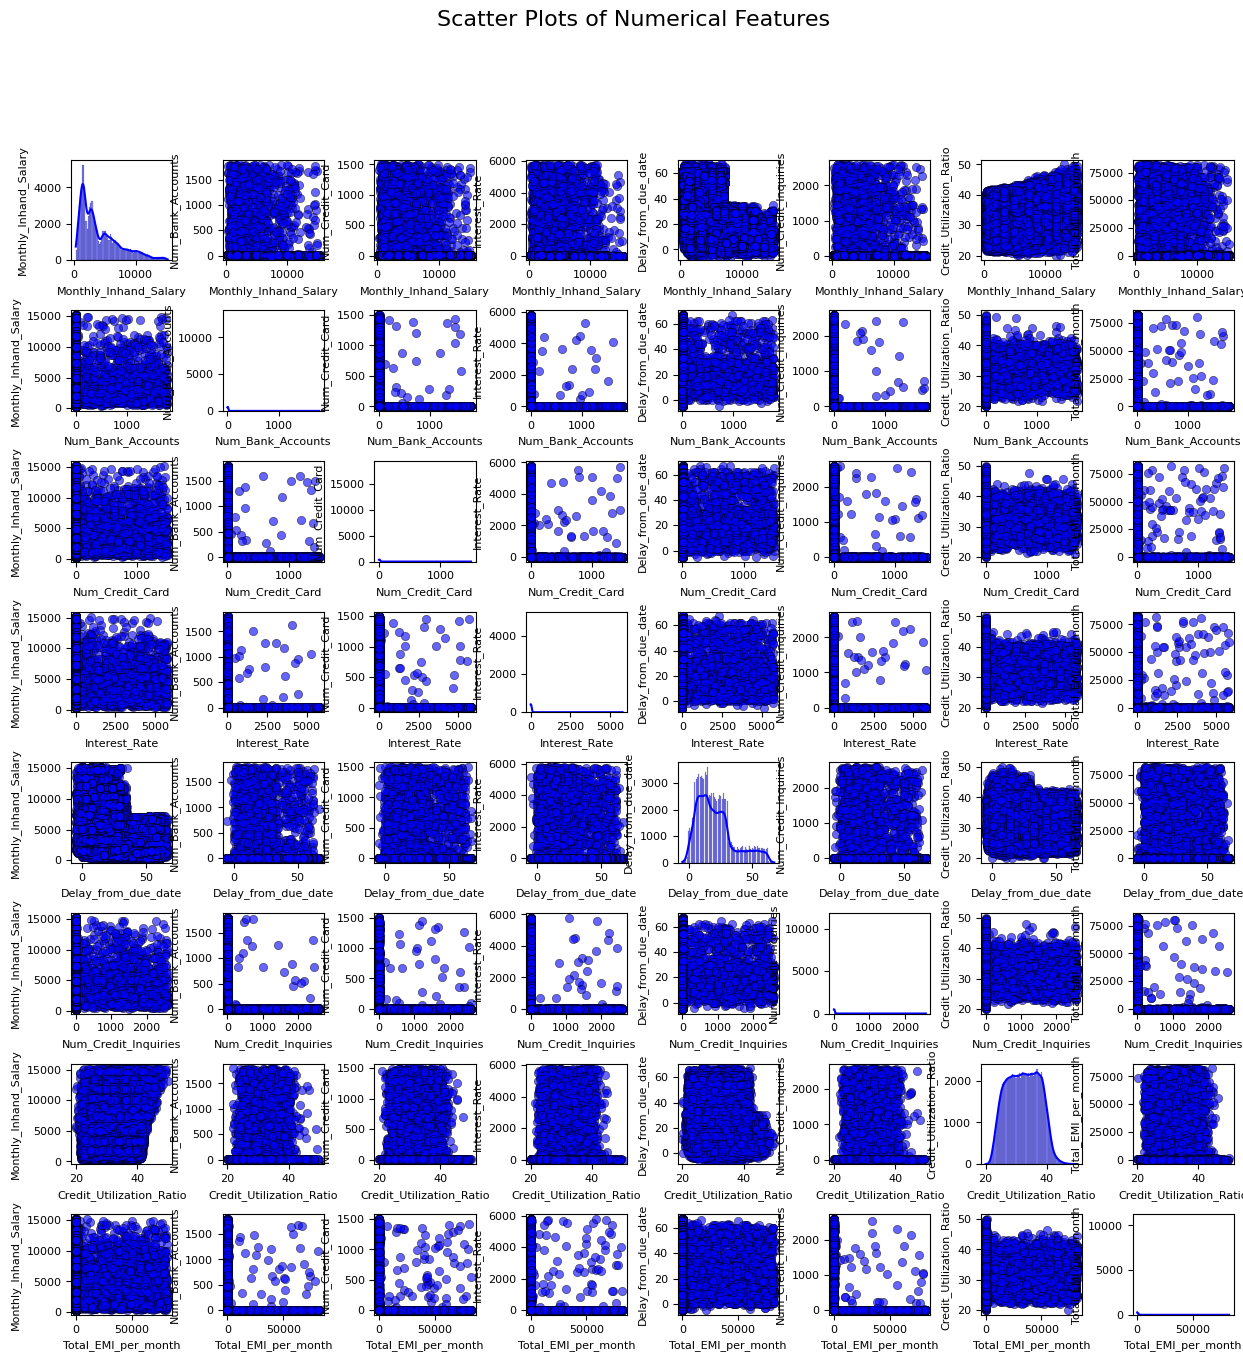

In [ ]:

numerical_features = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                      'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']

n_features = len(numerical_features)
fig, axes = plt.subplots(nrows=n_features, ncols=n_features, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(n_features):
    for j in range(n_features):
        if i != j:
            sns.scatterplot(x=df[numerical_features[i]], y=df[numerical_features[j]], ax=axes[i, j], alpha=0.6, color='blue', edgecolor='black')
        else:
            sns.histplot(df[numerical_features[i]], ax=axes[i, j], color='blue', kde=True)
        axes[i, j].set_xlabel(numerical_features[i], fontsize=8)
        axes[i, j].set_ylabel(numerical_features[j], fontsize=8)
        axes[i, j].tick_params(axis='both', which='major', labelsize=8)
plt.suptitle('Scatter Plots of Numerical Features', fontsize=16)
plt.show()

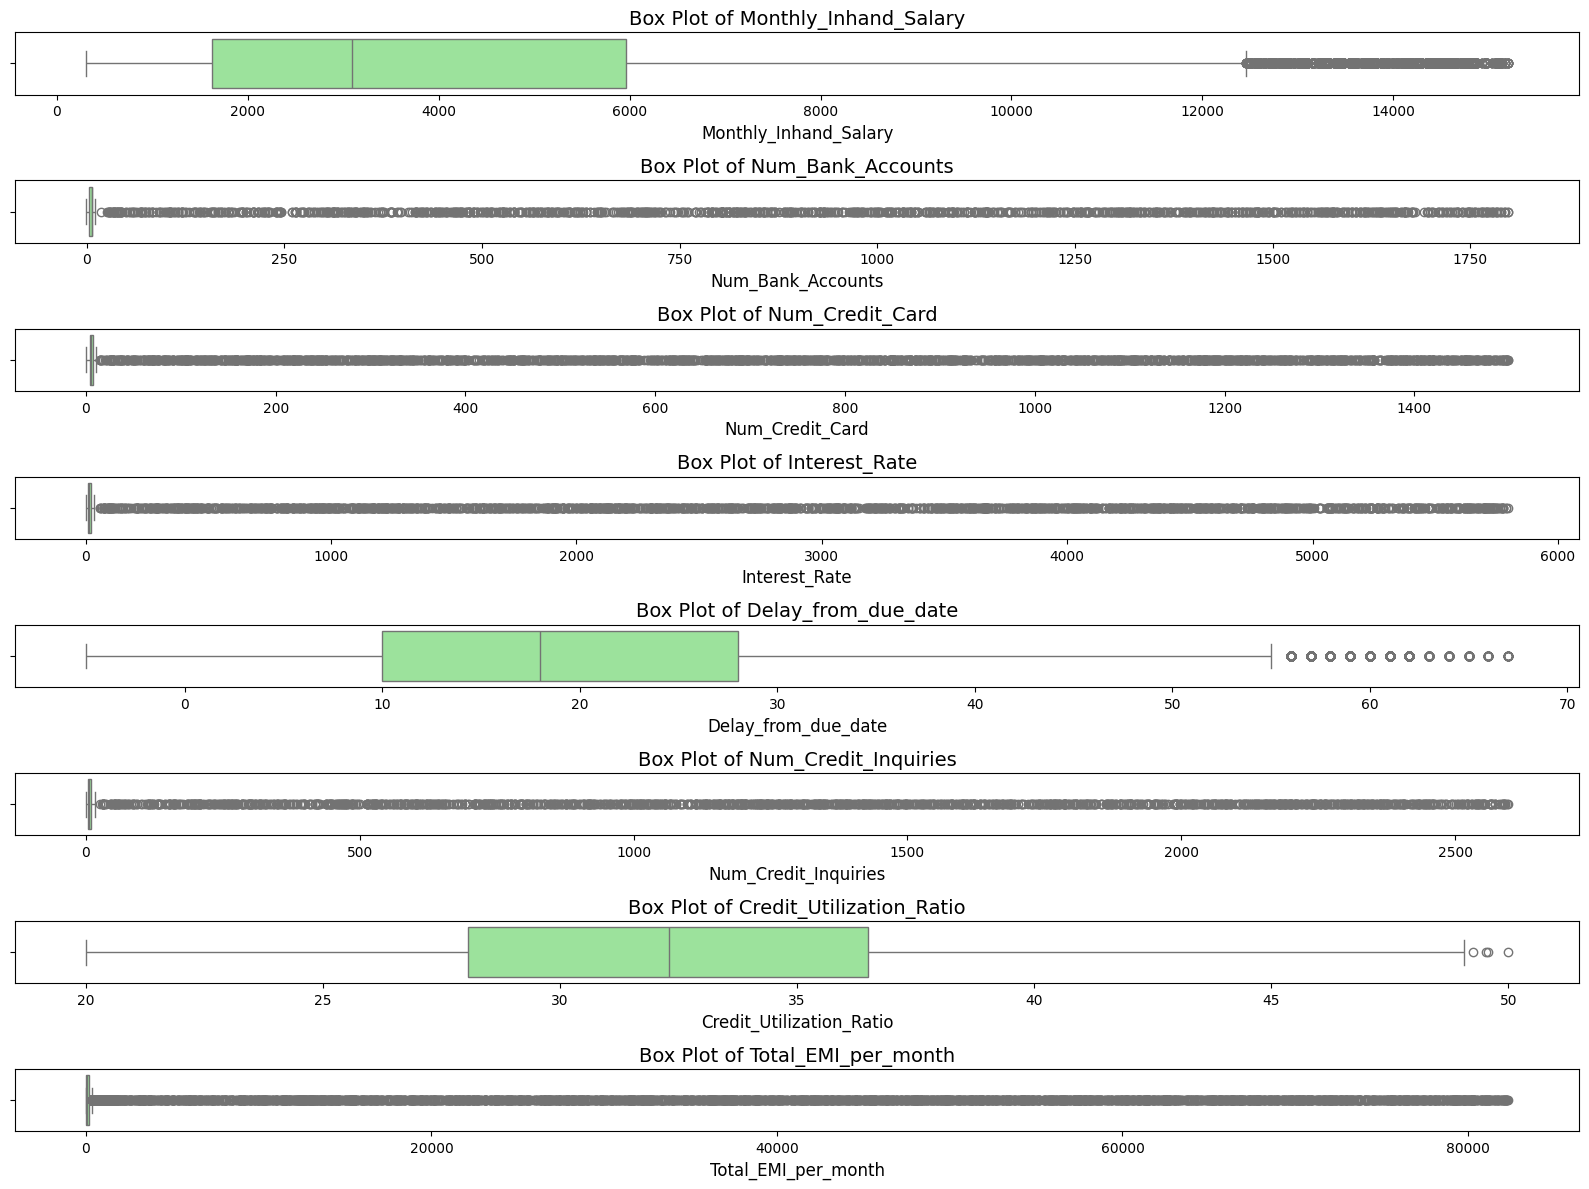

In [ ]:

numerical_features = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                      'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=df[feature], color='lightgreen')
    plt.title(f'Box Plot of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

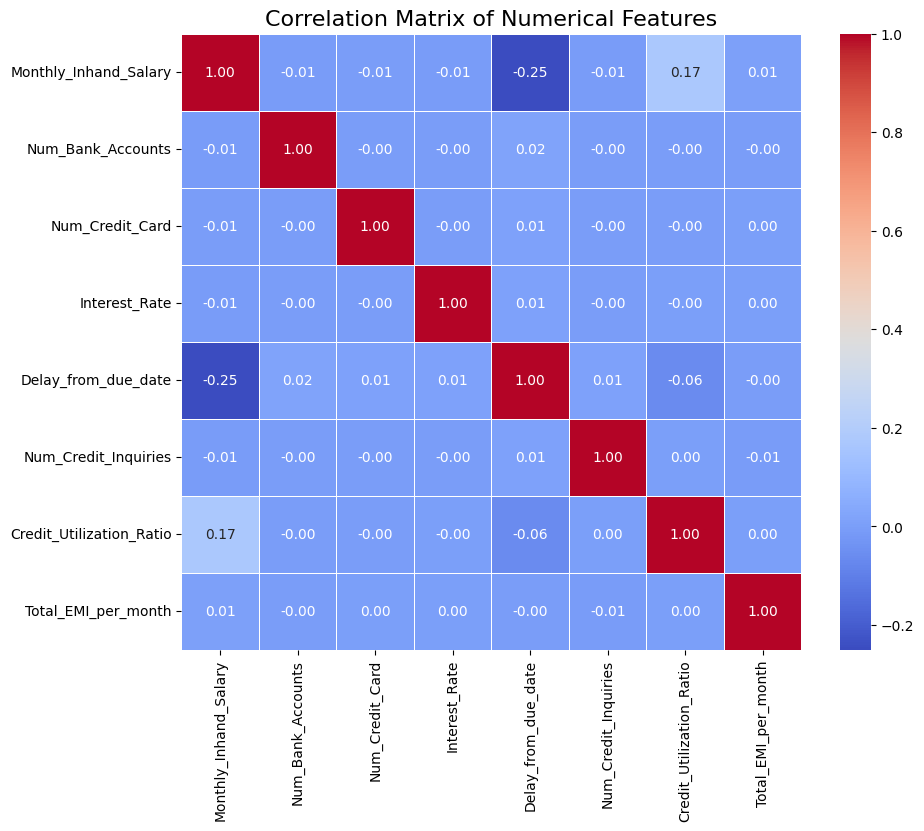

In [ ]:

numerical_features = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                      'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

#Checking Duplicate

In [24]:

duplicates = df[df.duplicated()]
print(f'Number of duplicate rows: {duplicates.shape[0]}')
print('Duplicate rows:')
print(duplicates)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance]
Index: []

[0 rows x 27 columns]


In [25]:
print(f'Number of rows before removing duplicates: {df.shape[0]}')

df_cleaned = df.drop_duplicates()
print(f'Number of rows after removing duplicates: {df_cleaned.shape[0]}')

cleaned_file_path = 'cleaned_credit_score.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f'Cleaned dataset saved to: {cleaned_file_path}')

Number of rows before removing duplicates: 100000
Number of rows after removing duplicates: 100000
Cleaned dataset saved to: cleaned_credit_score.csv


In [30]:
print("Dataset Info:")
df.info()
print("\nFirst few rows:")
print(df.head())

print("\nMissing Values by Column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

numerical_features = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                      'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']

df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

categorical_features = ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income',
                        'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                        'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
                        'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

print("\nMissing Values After Handling:")
print(df.isnull().sum())

cleaned_file_path = 'cleaned_credit_score.csv'
df.to_csv(cleaned_file_path, index=False)

print(f'\nCleaned dataset saved to: {cleaned_file_path}')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 91855 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        91855 non-null  object 
 1   Customer_ID               91855 non-null  object 
 2   Month                     91855 non-null  object 
 3   Name                      91855 non-null  object 
 4   Age                       91855 non-null  float64
 5   SSN                       91855 non-null  object 
 6   Occupation                91855 non-null  object 
 7   Annual_Income             91855 non-null  object 
 8   Monthly_Inhand_Salary     91855 non-null  float64
 9   Num_Bank_Accounts         91855 non-null  int64  
 10  Num_Credit_Card           91855 non-null  int64  
 11  Interest_Rate             91855 non-null  int64  
 12  Num_of_Loan               91855 non-null  object 
 13  Type_of_Loan              91855 non-null  object 
 1

In [33]:
print("Dataset Info:")
df.info()

print("\nFirst few rows:")
print(df.head())
print("\nCurrent Data Types:")
print(df.dtypes)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Monthly_Inhand_Salary'] = pd.to_numeric(df['Monthly_Inhand_Salary'], errors='coerce')
categorical_features = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan',
                        'Credit_Mix', 'Payment_Behaviour']
df[categorical_features] = df[categorical_features].astype('category')

print("\nData Types After Conversion:")
print(df.dtypes)
cleaned_file_path = 'cleaned_credit_score.csv'
df.to_csv(cleaned_file_path, index=False)

print(f'\nCleaned dataset with corrected data types saved to: {cleaned_file_path}')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 91855 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID                        91855 non-null  category
 1   Customer_ID               91855 non-null  category
 2   Month                     91855 non-null  category
 3   Name                      91855 non-null  category
 4   Age                       91855 non-null  float64 
 5   SSN                       91855 non-null  category
 6   Occupation                91855 non-null  category
 7   Annual_Income             91855 non-null  object  
 8   Monthly_Inhand_Salary     91855 non-null  float64 
 9   Num_Bank_Accounts         91855 non-null  int64   
 10  Num_Credit_Card           91855 non-null  int64   
 11  Interest_Rate             91855 non-null  int64   
 12  Num_of_Loan               91855 non-null  object  
 13  Type_of_Loan              91855 non-n